<a href="https://colab.research.google.com/github/JatinKhare/InstiApp/blob/master/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import os

os.chdir('/content/drive/My Drive/GoogleColab/Flower')
os.listdir()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


['flower_images',
 'FlowerColorImages.h5',
 'flower_images.zip',
 'flower_labels.csv']

In [0]:
import os
import numpy as np
import skimage.io as io
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.utils import *
from keras.optimizers import Adam
from keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

In [0]:
flowers = pd.read_csv("flower_labels.csv")

file_name = flowers['file']
label_name = flowers['label']

In [11]:

print(label_name[112])

2


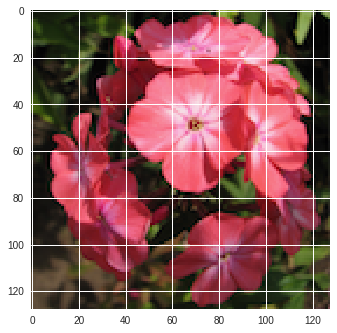

In [12]:
image = io.imread("./flower_images/flower_images/0001.png")
plt.imshow(image)

In [13]:
X = []
from keras.preprocessing import image as keras_image
for i in file_name:
  img = keras_image.load_img("./flower_images/flower_images/"+i,target_size=(128, 128))
  x = keras_image.img_to_array(img)
  np.expand_dims(x, axis=0)
  X.append(x)
X = np.array(X)
X.shape

(210, 128, 128, 3)

In [14]:
"""import glob
from numpy import array
direc = glob.glob("./flower_images/flower_images/*.png")
X_dat = []
for imag in direc:
  image = io.imread(imag)
  image1 = np.array(image)
  X_dat.append(image1)

X_data = np.array(X_dat)

X_data.reshape(210,11,11,1)
print(X_data.shape)"""

'import glob\nfrom numpy import array\ndirec = glob.glob("./flower_images/flower_images/*.png")\nX_dat = []\nfor imag in direc:\n  image = io.imread(imag)\n  image1 = np.array(image)\n  X_dat.append(image1)\n\nX_data = np.array(X_dat)\n\nX_data.reshape(210,11,11,1)\nprint(X_data.shape)'

In [0]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, label_name, test_size = 0.2, random_state = 1)
y_train = y_train.reshape(168,1)
y_test = y_test.reshape(42,1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


((168, 128, 128, 3), (168, 1), (42, 128, 128, 3), (42, 1))

Label:  [5]


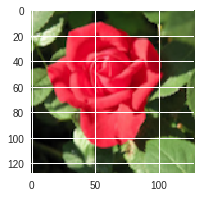

In [17]:
print('Label: ', y_train[22])
plt.figure(figsize=(3,3))
plt.imshow((x_train[2]/255));

In [19]:
model = Sequential()
    
model.add(Dense(128, activation='relu', input_shape=(128*128*3,)))
model.add(BatchNormalization())
    
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization()) 
    
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
    
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))     
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
n = int(len(x_test)/2)
x_valid, y_valid = x_test[:n], y_test[:n]
x_test, y_test = x_test[n:], y_test[n:]
x_train.shape, x_test.shape, x_valid.shape, y_train.shape, y_test.shape, y_valid.shape

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_valid = x_valid.astype('float32')/255

c_y_train = to_categorical(y_train, 10)
c_y_test = to_categorical(y_test, 10)
c_y_valid = to_categorical(y_valid, 10)

[x_train.shape, c_y_train.shape, x_test.shape, c_y_test.shape, x_valid.shape, c_y_valid.shape]

[(168, 128, 128, 3),
 (168, 10),
 (21, 128, 128, 3),
 (21, 10),
 (21, 128, 128, 3),
 (21, 10)]

In [23]:

datagen.fit(x_train)

model.fit(x_train.reshape(-1, 128*128*3), c_y_train,
                                  validation_data=(x_valid.reshape(-1, 128*128*3), c_y_valid),
                                  epochs=50, batch_size=64, verbose=2)

Train on 168 samples, validate on 21 samples
Epoch 1/50
 - 3s - loss: 2.4136 - acc: 0.2321 - val_loss: 7.4969 - val_acc: 0.0952
Epoch 2/50
 - 0s - loss: 1.2769 - acc: 0.5833 - val_loss: 6.3491 - val_acc: 0.2381
Epoch 3/50
 - 0s - loss: 0.6359 - acc: 0.8274 - val_loss: 5.6703 - val_acc: 0.2381
Epoch 4/50
 - 0s - loss: 0.2837 - acc: 0.9643 - val_loss: 5.4254 - val_acc: 0.2857
Epoch 5/50
 - 0s - loss: 0.1576 - acc: 0.9643 - val_loss: 5.2052 - val_acc: 0.2857
Epoch 6/50
 - 0s - loss: 0.0897 - acc: 0.9881 - val_loss: 5.1223 - val_acc: 0.3333
Epoch 7/50
 - 0s - loss: 0.0389 - acc: 1.0000 - val_loss: 4.5083 - val_acc: 0.4286
Epoch 8/50
 - 0s - loss: 0.0310 - acc: 0.9940 - val_loss: 3.9243 - val_acc: 0.3810
Epoch 9/50
 - 0s - loss: 0.0312 - acc: 0.9940 - val_loss: 3.6779 - val_acc: 0.4286
Epoch 10/50
 - 0s - loss: 0.0107 - acc: 1.0000 - val_loss: 3.6814 - val_acc: 0.4286
Epoch 11/50
 - 0s - loss: 0.0102 - acc: 1.0000 - val_loss: 3.6512 - val_acc: 0.4762
Epoch 12/50
 - 0s - loss: 0.0089 - acc: 